<a href="https://colab.research.google.com/github/mohsinzamankhan/first_repo/blob/main/cats_and_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets


In [ ]:
!pip install opendatasets
import opendatasets as od
# After accepting the rules on the Kaggle website, you need to authenticate with Kaggle using an API key
od.download("https://www.kaggle.com/c/dogs-vs-cats/data", kaggle_username="mohsinzzaman", kaggle_key="") # Replace with your actual details
#uploading data set from the kaggle

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohsinzzaman
Your Kaggle Key: ··········


100%|██████████| 812M/812M [00:12<00:00, 66.5MB/s]



Extracting archive ./dogs-vs-cats/dogs-vs-cats.zip to ./dogs-vs-cats


In [ ]:
import os

In [ ]:
# Check the current content directory
os.listdir('/content')


['.config', 'dogs-vs-cats', 'sample_data']

Unziping the data

In [ ]:
import zipfile
# Paths to the zip files
train_zip_path = '/content/dogs-vs-cats/train.zip'  # Update with your actual file path
test_zip_path = '/content/dogs-vs-cats/test1.zip'   # Update with your actual file path

# Unzipping the train.zip
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dogs-vs-cats/train')

# Unzipping the test1.zip
with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dogs-vs-cats/test1')

print("Files unzipped successfully!")


Files unzipped successfully!


Making the directory

In [ ]:
import shutil, os
original_dataset_dir='/content/dogs-vs-cats/train/train'
base_dir = '/content/cats_and_dogs_small'
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)


Coping the images to the directory

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
 src = os.path.join(original_dataset_dir, fname)
 dst = os.path.join(train_cats_dir, fname)
 if os.path.exists(src):
        shutil.copyfile(src, dst)
 else:
        print(f"Warning: Source file not found: {src}")

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
 src = os.path.join(original_dataset_dir, fname)
 dst = os.path.join(validation_cats_dir, fname)
 shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
 src = os.path.join(original_dataset_dir, fname)
 dst = os.path.join(test_cats_dir, fname)
 shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
 src = os.path.join(original_dataset_dir, fname)
 dst = os.path.join(train_dogs_dir, fname)
 shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
 src = os.path.join(original_dataset_dir, fname)
 dst = os.path.join(validation_dogs_dir, fname)
 shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
 src = os.path.join(original_dataset_dir, fname)
 dst = os.path.join(test_dogs_dir, fname)
 shutil.copyfile(src, dst)

In [ ]:
import shutil, os
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


Making the model

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras import optimizers

# Use the optimizer from the new API
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])


Rescaling the image and target_size

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
 train_dir,
 target_size=(150, 150),
 batch_size=20,
 class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
 validation_dir,
 target_size=(150, 150),
 batch_size=20,
 class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Training the model

In [ ]:
history = model.fit(
 train_generator,
 steps_per_epoch=63,
 epochs=30,
 validation_data=validation_generator,
 validation_steps=31)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - acc: 0.5622 - loss: 0.6817 - val_acc: 0.5113 - val_loss: 0.6837
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 764ms/step - acc: 0.5690 - loss: 0.6737 - val_acc: 0.4737 - val_loss: 0.7261
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - acc: 0.5828 - loss: 0.6752 - val_acc: 0.6306 - val_loss: 0.6502
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 766ms/step - acc: 0.6652 - loss: 0.6423 - val_acc: 0.6184 - val_loss: 0.6496
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - acc: 0.6527 - loss: 0.6233 - val_acc: 0.6000 - val_loss: 0.6370
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - acc: 0.6882 - loss: 0.5986 - val_acc: 0.6211 - val_loss: 0.6197
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - acc: 0.6791 - loss: 0.5906 - val_acc: 0.6435 - val_loss: 0.6112
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 763ms/step - acc: 0.6976 - loss: 0.5779 - val_acc: 0.5947 - val_loss: 0.6530
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - acc: 0.7060

In [ ]:
model.save('cats_and_dogs_small_1.h5')

In [ ]:
model.save('my_model.keras')


ploting the result

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


NameError: name 'history' is not defined

This function is for data augmentation

In [ ]:
datagen = ImageDataGenerator(
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest')

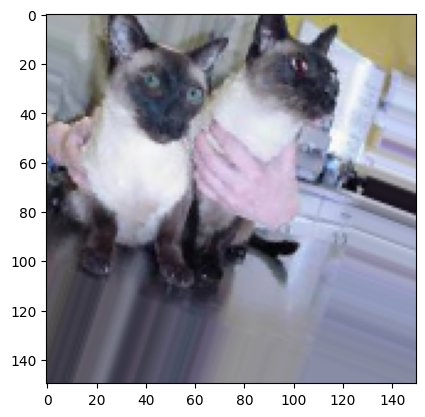

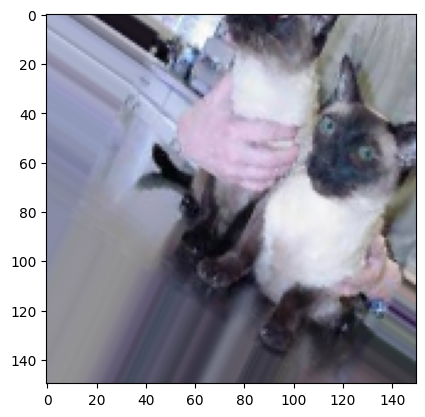

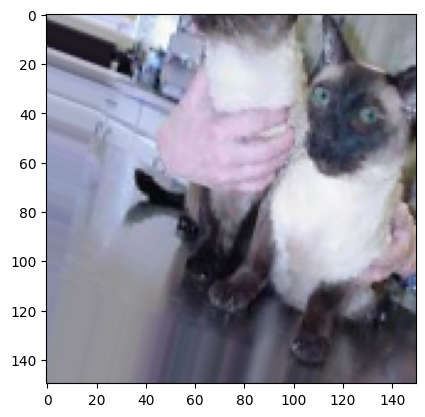

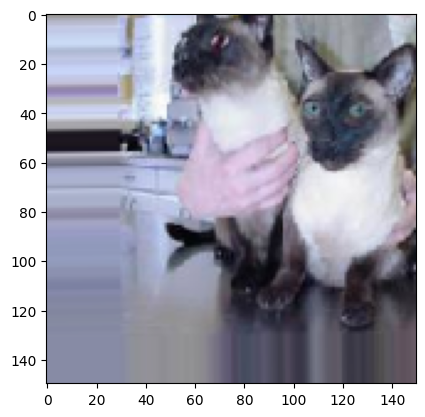

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
 fname in os.listdir(train_cats_dir)]

img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
 plt.figure(i)
 imgplot = plt.imshow(image.array_to_img(batch[0]))
 i += 1
 if i % 4 == 0:
    break

 plt.show()

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
 optimizer=optimizers.RMSprop(learning_rate=1e-4),
 metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator(
 rescale=1./255,
 rotation_range=20,
 width_shift_range=0.1,
 height_shift_range=0.1,
 shear_range=0.1,
 zoom_range=0.1,
 horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
 train_dir,
 target_size=(150, 150),
 batch_size=32,
 class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
 validation_dir,
 target_size=(150, 150),
 batch_size=32,
 class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(
 train_generator,
 steps_per_epoch=337,
 epochs=30,
 validation_data=validation_generator,
 validation_steps=62)

Epoch 1/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 137s 395ms/step - acc: 0.5458 - loss: 0.6864 - val_acc: 0.5570 - val_loss: 0.6738
Epoch 2/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 138s 396ms/step - acc: 0.5733 - loss: 0.6751 - val_acc: 0.5130 - val_loss: 0.7119
Epoch 3/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 141s 408ms/step - acc: 0.5829 - loss: 0.6725 - val_acc: 0.6150 - val_loss: 0.6528
Epoch 4/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 137s 397ms/step - acc: 0.6080 - loss: 0.6610 - val_acc: 0.6040 - val_loss: 0.6514
Epoch 5/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 136s 390ms/step - acc: 0.6084 - loss: 0.6568 - val_acc: 0.6310 - val_loss: 0.6348
Epoch 6/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 140s 405ms/step - acc: 0.6315 - loss: 0.6406 - val_acc: 0.6460 - val_loss: 0.6270
Epoch 7/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 142s 407ms/step - acc: 0.6602 - loss: 0.6214 - val_acc: 0.5440 - val_loss: 0.7493
Epoch 8/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 136s 395ms/step - acc: 0.6744 - loss: 0.6115 - val_acc: 0.6840 - val_loss: 0.5889
Epoch 9/30
337/337 ━━━━━

In [ ]:
model.save('cats_and_dogs_small_2.h5')

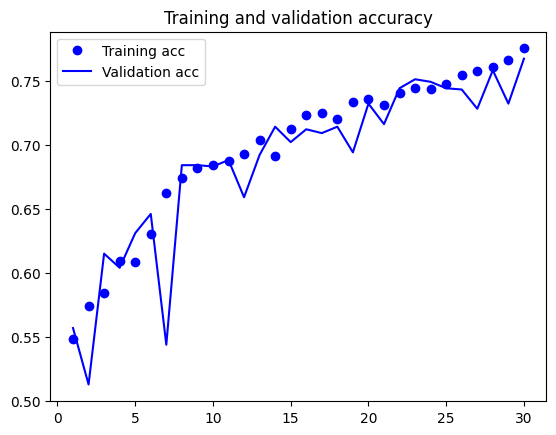

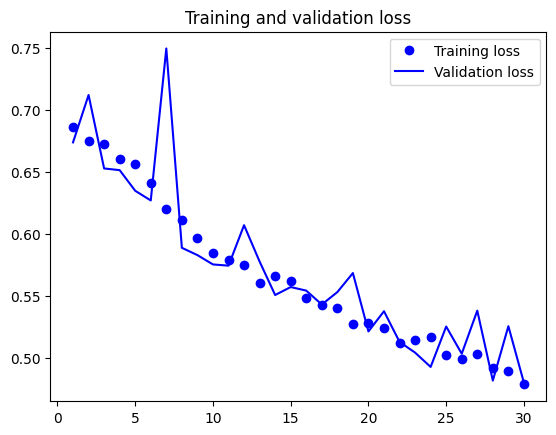

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()